In [1]:
# show R version
version

               _                           
platform       x86_64-pc-linux-gnu         
arch           x86_64                      
os             linux-gnu                   
system         x86_64, linux-gnu           
status                                     
major          4                           
minor          0.3                         
year           2020                        
month          10                          
day            10                          
svn rev        79318                       
language       R                           
version.string R version 4.0.3 (2020-10-10)
nickname       Bunny-Wunnies Freak Out     

# About dose and response

## Basic data structure

**dose:** certein amount of biological, chemical or radiation stress (also called explanatory variable or predictor or x)

**response:** biological reaction to a given dose of stress (also called endpoint or outcome or y)

## Various ways to quantify the respone

* continous/quatitative (length, optical density, weight)
* discrete/quantal (binary, counts, multinomial)
* survival in terms of event times

## Parametric models

A list of some common and less common dose-response models:

* logistic/log-logistic models
    * sepcial cases: exponential decay and Michaelis-Menten models
    * asymmetric extensions: baroflex and generalized log-logistic

* asymmetric Weibull models (2 types)

* other monotonous models:
    * log-normal model
    * fractional polynomial dose-response models
    * treshold models

* non-monotonous models:
    * inverse j-shaped,u-shaped hormesis models
    * biphasic models

## Log-logistic model:

$f(dose) = c + \frac{d-c}{1+(dose/e)^b}$ 

## What are dose-response models used for?

* A single dose-response curve:
    * estimating relevant parameters such as *effective doses* (inverse regression problem)
    * quantifying the uncertainty associated with the estimates

* Several dose-response curves:
    * calculating *relative potency* between curves (ratios of effective doses)
    * comparing entiire dose-response curves
    * comparing only specific model parametes or derived parameters







In [3]:
install.packages("drc")
library(drc)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘matrixStats’, ‘RcppArmadillo’, ‘zip’, ‘SparseM’, ‘MatrixModels’, ‘conquer’, ‘sp’, ‘data.table’, ‘openxlsx’, ‘minqa’, ‘nloptr’, ‘statmod’, ‘RcppEigen’, ‘zoo’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘rio’, ‘lme4’, ‘mvtnorm’, ‘TH.data’, ‘sandwich’, ‘car’, ‘gtools’, ‘multcomp’, ‘plotrix’


Loading required package: MASS


'drc' has been loaded.


Please cite R and 'drc' if used for a publication,

for references type 'citation()' and 'citation('drc')'.



Attaching package: ‘drc’


The following objects are masked from ‘package:stats’:

    gaussian, getInitial




In [4]:
# example dataset for continous data
head(ryegrass)

,rootl,conc
,<dbl>,<dbl>
1,7.580000,0
2,8.000000,0
3,8.328571,0
4,7.250000,0
5,7.375000,0
6,7.962500,0


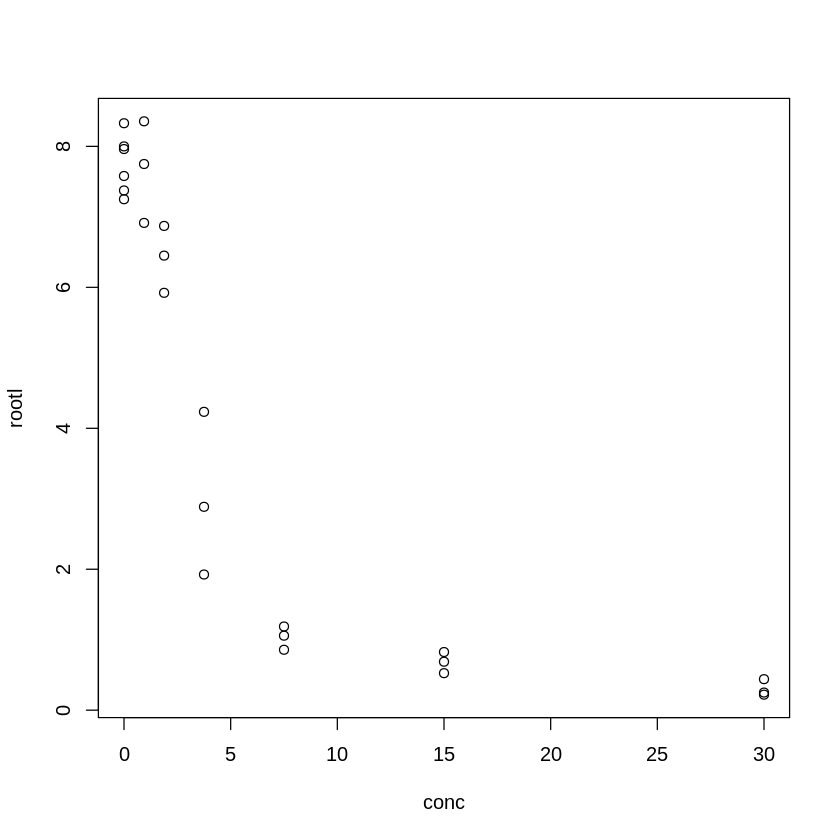

In [5]:
plot(rootl ~ conc, data=ryegrass)

Warning message in xy.coords(x, y, xlabel, ylabel, log):
“6 x values <= 0 omitted from logarithmic plot”


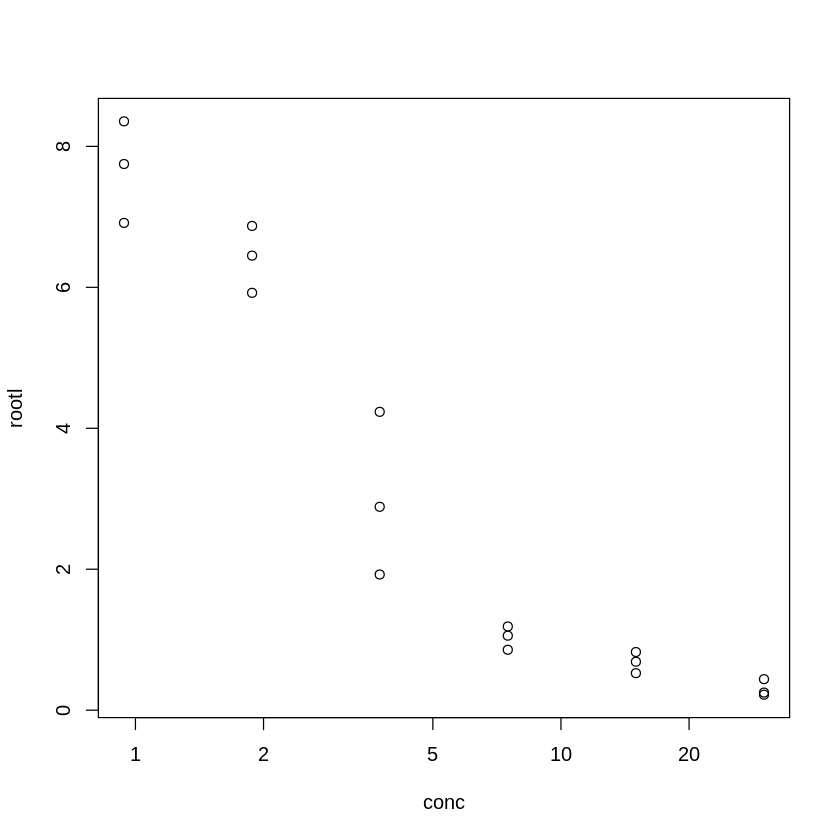

In [6]:
plot(rootl ~ conc, data=ryegrass, log='x')

In [7]:
ryegrass.LL4 <- drm(rootl ~ conc, data=ryegrass, fct = LL.4()) # 4-parameter logistic model

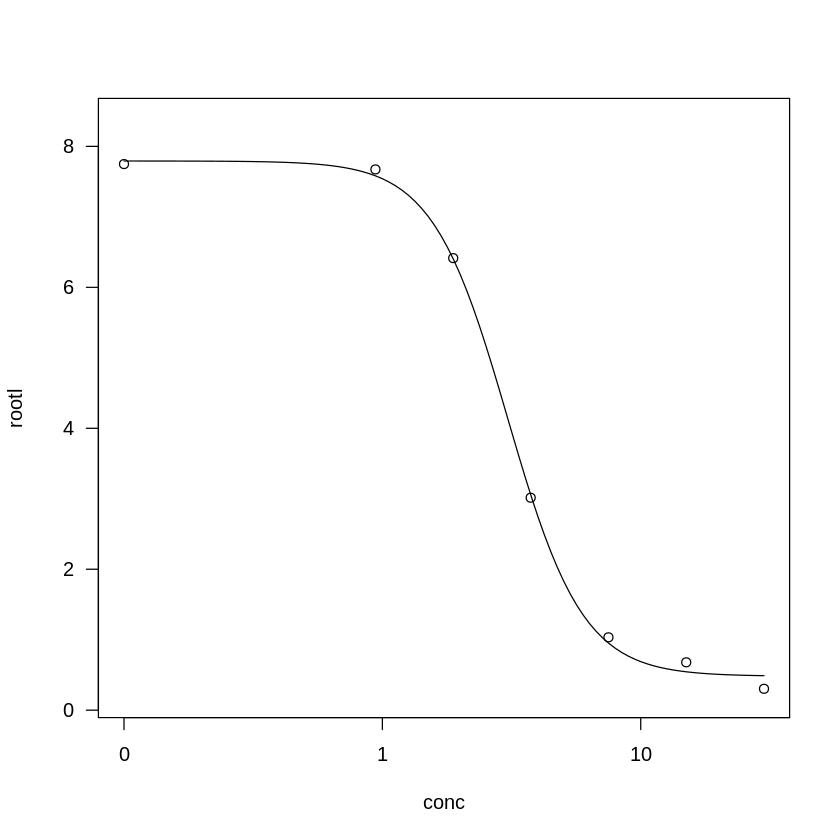

In [8]:
plot(ryegrass.LL4, broken=TRUE)

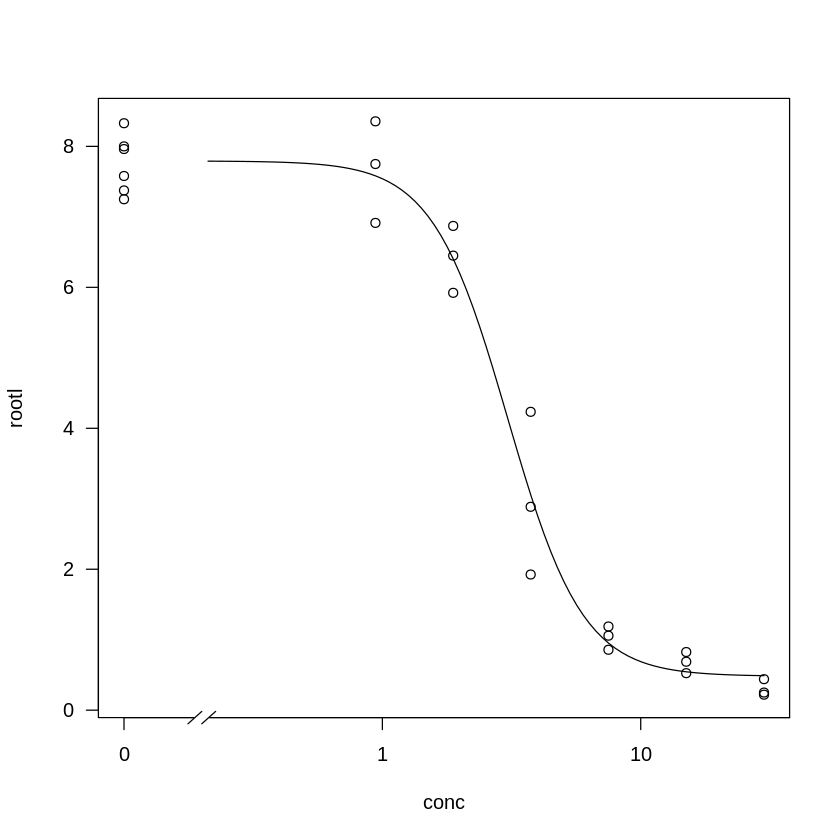

In [9]:
plot(ryegrass.LL4, broken=TRUE, type='all')

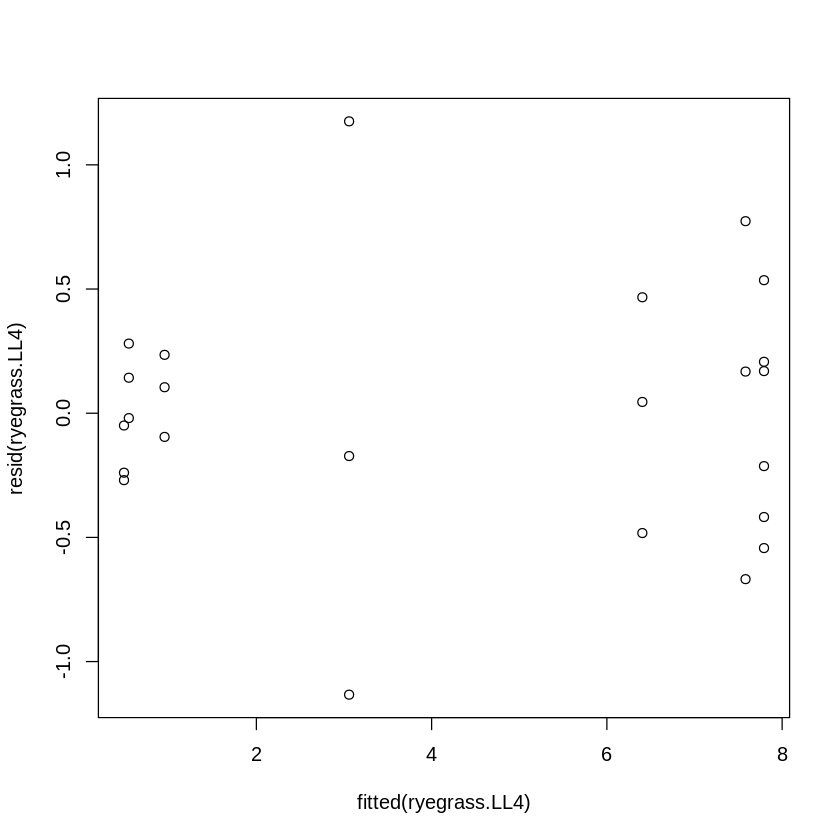

In [10]:
plot(fitted(ryegrass.LL4),resid(ryegrass.LL4))

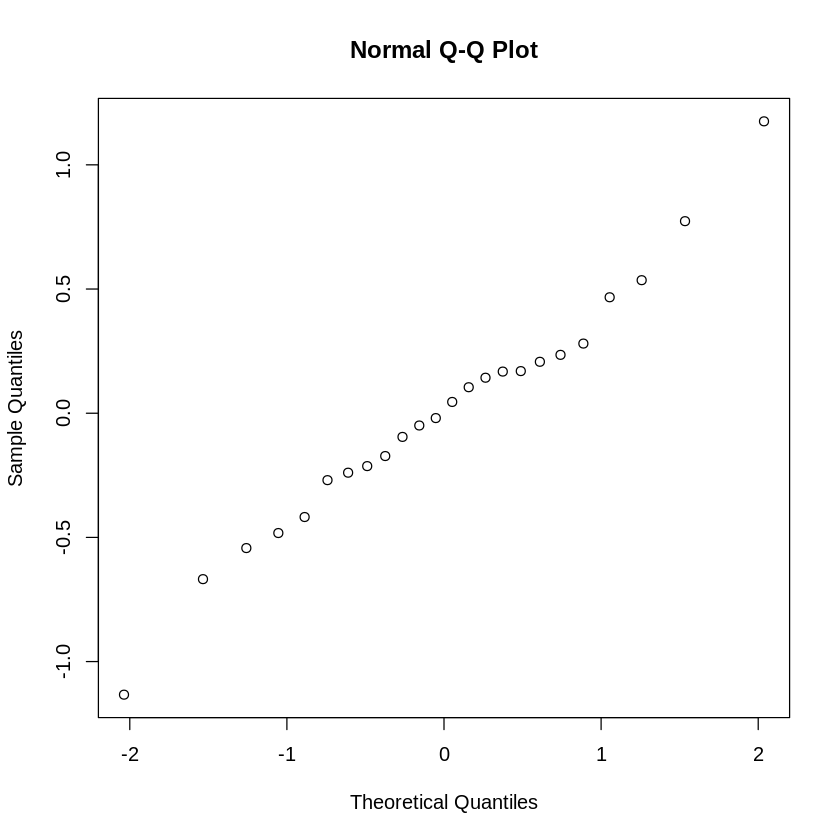

In [11]:
# qq-plot as requirement to show normal distribution (want to see straigt line here)
qqnorm(resid(ryegrass.LL4))

In [12]:
summary(ryegrass.LL4)


Model fitted: Log-logistic (ED50 as parameter) (4 parms)

Parameter estimates:

              Estimate Std. Error t-value   p-value    
b:(Intercept)  2.98222    0.46506  6.4125 2.960e-06 ***
c:(Intercept)  0.48141    0.21219  2.2688   0.03451 *  
d:(Intercept)  7.79296    0.18857 41.3272 < 2.2e-16 ***
e:(Intercept)  3.05795    0.18573 16.4644 4.268e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error:

 0.5196256 (20 degrees of freedom)

In [13]:
# confidence intervalls
confint(ryegrass.LL4)

,2.5 %,97.5 %
b:(Intercept),2.01211606,3.9523221
c:(Intercept),0.03878752,0.9240389
d:(Intercept),7.39961398,8.1863026
e:(Intercept),2.67052621,3.4453837


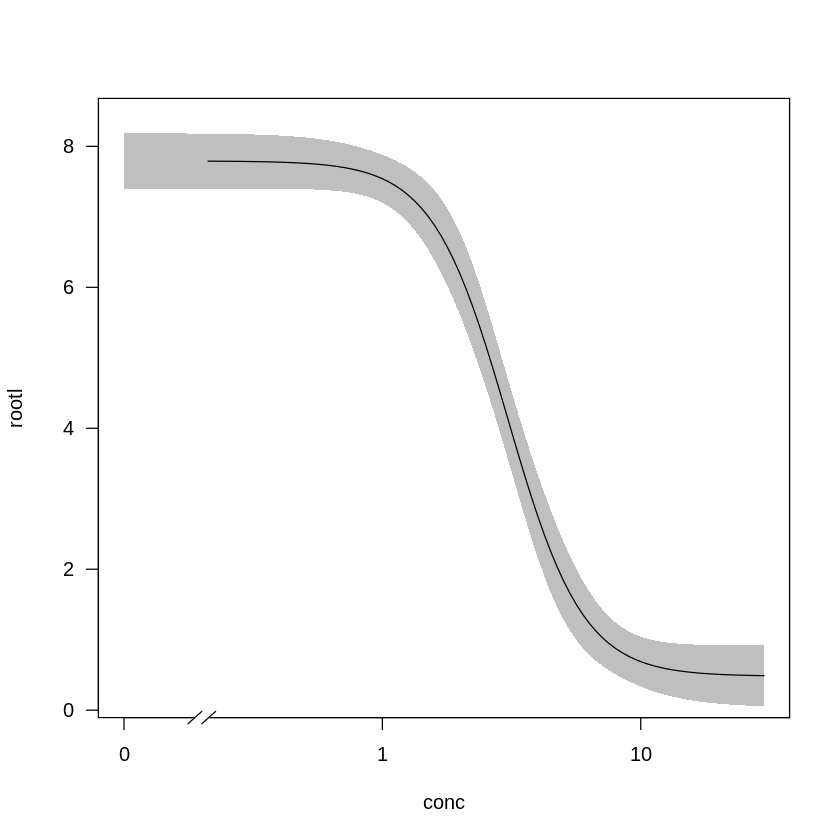

In [18]:
suppressWarnings({plot(ryegrass.LL4, broken=TRUE, type='confidence')})

In [19]:
# 3 paramter logistic model
ryegrass.LL3 <- drm(rootl ~ conc, data=ryegrass, fct=LL.3())
summary(ryegrass.LL3)


Model fitted: Log-logistic (ED50 as parameter) with lower limit at 0 (3 parms)

Parameter estimates:

              Estimate Std. Error t-value   p-value    
b:(Intercept)  2.47033    0.34168  7.2299 4.011e-07 ***
d:(Intercept)  7.85543    0.20438 38.4352 < 2.2e-16 ***
e:(Intercept)  3.26336    0.19641 16.6154 1.474e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error:

 0.5615802 (21 degrees of freedom)

In [20]:
# different ED values estimates
ED(ryegrass.LL4, c(10, 20, 50))


Estimated effective doses

       Estimate Std. Error
e:1:10  1.46371    0.18677
e:1:20  1.92109    0.17774
e:1:50  3.05795    0.18573


In [21]:
# confident intervalls
ED(ryegrass.LL4, c(10,20,50), interval='delta')


Estimated effective doses

       Estimate Std. Error   Lower   Upper
e:1:10  1.46371    0.18677 1.07411 1.85330
e:1:20  1.92109    0.17774 1.55032 2.29186
e:1:50  3.05795    0.18573 2.67053 3.44538


In [23]:
# t test for coefficients
install.packages('lmtest')
library(lmtest)
install.packages('sandwich')
library(sandwich)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [27]:
coeftest(ryegrass.LL4)


t test of coefficients:

              Estimate Std. Error t value  Pr(>|t|)    
b:(Intercept)  2.98222    0.46506  6.4125 2.960e-06 ***
c:(Intercept)  0.48141    0.21219  2.2688   0.03451 *  
d:(Intercept)  7.79296    0.18857 41.3272 < 2.2e-16 ***
e:(Intercept)  3.05795    0.18573 16.4644 4.268e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [32]:
# example for binomial data
head(finney71) # insects affected by pesticide

,dose,total,affected
,<dbl>,<int>,<int>
1,10.2,50,44
2,7.7,49,42
3,5.1,46,24
4,3.8,48,16
5,2.6,50,6
6,0.0,49,0


In [39]:
finney.LL2 <- drm(affected/total~dose, data=finney71, fct=LL.2(), weight=total, type = 'binomial')

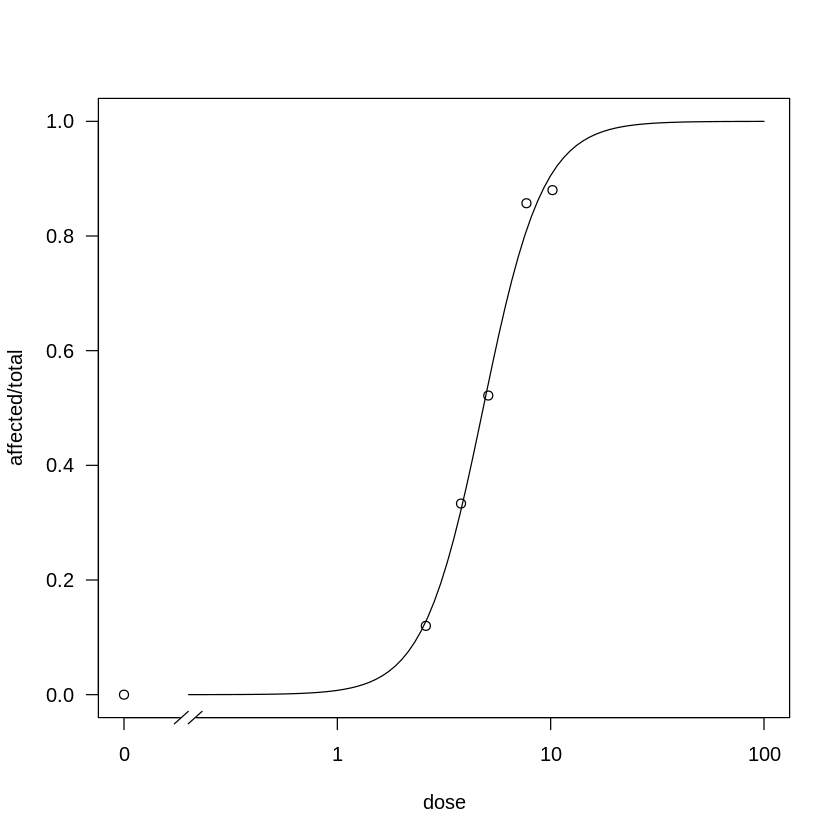

In [40]:
plot(finney.LL2, broken = TRUE, xlim=c(0,100), ylim=c(0,1))

In [41]:
summary(finney.LL2) # ED50 around 4.8


Model fitted: Log-logistic (ED50 as parameter) with lower limit at 0 and upper limit at 1 (2 parms)

Parameter estimates:

              Estimate Std. Error t-value   p-value    
b:(Intercept) -3.10363    0.38773 -8.0047 1.154e-15 ***
e:(Intercept)  4.82890    0.24958 19.3485 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [42]:
# ED10, ED20, ED90
ED(finney.LL2, c(10,20, 90), interval = 'delta')


Estimated effective doses

       Estimate Std. Error    Lower    Upper
e:1:10  2.37896    0.25164  1.88576  2.87217
e:1:20  3.08932    0.24372  2.61163  3.56700
e:1:90  9.80184    0.97020  7.90028 11.70341


In [43]:
finney.LL3 <- drm(affected/total~dose, data=finney71, fct=LL.3(), weight=total, type='binomial')
summary(finney.LL3)


Model fitted: Log-logistic (ED50 as parameter) with lower limit at 0 (3 parms)

Parameter estimates:

               Estimate Std. Error t-value   p-value    
b:(Intercept) -3.519311   0.783380 -4.4925  7.04e-06 ***
d:(Intercept)  0.948526   0.071333 13.2972 < 2.2e-16 ***
e:(Intercept)  4.577182   0.402013 11.3857 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1